In [876]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [974]:
#датасет
data, target, coef = sklearn.datasets.make_regression(n_samples = 1000, n_features = 2, n_informative=2, n_targets=1, noise =7, coef=True, random_state =2 )

In [975]:
data[0,:]

array([ 0.37879447, -0.61837549])

In [976]:
sum(data[:, 1])/1000

0.02045785219888101

In [977]:
mean = np.mean(data, axis = 0)
std = np.mean(data, axis = 0)
print(mean, std)


[-0.0790127   0.02045785] [-0.0790127   0.02045785]


In [978]:
# Проведем стандартизацию признаков:
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i, j] = (data[i, j] - mean[j]) / std[j]

In [979]:
data[0,:]

array([ -5.79409582, -31.22680382])

In [885]:
def mse(X, w, y):
    mse = sum((y - X.dot(w))**2)/data.shape[0]
    return mse
    

In [886]:
# начальные значения 
w = np.zeros(2)
eta = 1e-4
max_iter = 10000
delta_stop = 1e-5
delta = 1e+5
n = data.shape[0]

In [887]:
# градиентный спуск
mse_gd = []
for iter in range(max_iter):
    
    err = mse(data, w, target)
    mse_gd.append(err)
    w_new = w - eta * 2 / n * (np.dot(data.T, (data.dot(w) - target)))

    delta = mse(data, w, target) - mse(data, w_new, target)

    w = w_new
    
    if iter > 1 and delta < delta_stop:
        print(iter, w_new, err)
        break
            

269 [-4.91319048  1.39873099] 63.72714390186238


In [888]:
# начальные значения 
w = np.zeros(2)
eta = 1e-2
max_iter = 10000
delta_weigth_stop = 1e-6
delta_weigth = 1e+5
n = data.shape[0]

In [889]:
# стохастический градиентный спуск
mse_sgd = []
for iter in range(max_iter):
    i = np.random.randint(0, data.shape[0])
    
    err = mse(data, w, target) 
    mse_sgd.append(err)
    
    w_new = w - eta * 2/n * (np.dot(data[i].T, (data[i].dot(w) - target[i])))

    delta_weigth = np.linalg.norm(w_new - w, ord=2)


    w = w_new
    if iter > 1 and delta_weigth < delta_weigth_stop:
        print(iter, w_new, err)
        break
   
 

1047 [-4.68951339  1.37683538] 72.56216582049494


(0, 500)

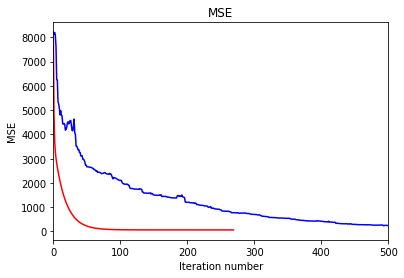

In [890]:
plt.plot(range(len(mse_gd)), mse_gd, color='r')
plt.plot(range(len(mse_sgd)), mse_sgd, color='b')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0,500)

In [891]:
# Вывод: скорость сходимости градиентного спуска выше (на графике - красным)

In [980]:
def mse_L2(X, w, y, coef_L2):
    mse_L2 = sum((y - X.dot(w))**2)/data.shape[0] + coef_L2 * np.sum(w ** 2)
    return mse_L2

In [981]:
# начальные значения 
w = np.zeros(2)
eta = 1e-4
max_iter = 1000
delta_stop = 1e-4
delta = 1e+5
n = data.shape[0]
coef_L2 = 0.01

In [963]:
# градиентный спуск + l2 регуляризация
mse_gd_L2 = []
for iter in range(max_iter):
    
    err = mse_L2(data, w, target, coef_L2)
    mse_gd_L2.append(err)
    w_new = w - eta * (2 / n * (np.dot(data.T, (data.dot(w) - target))) + 2 * coef_L2 * np.sum(w))
    

    delta = mse_L2(data, w, target, coef_L2) - mse_L2(data, w_new, target, coef_L2)
#     delta = np.abs(delta)

    w = w_new
    
#     if iter % 100 == 0:
#         print(iter, w_new, err, delta)
    
    if iter > 1 and delta < delta_stop:
        print(iter, w_new, err, abs(delta))
        break

232 [-4.91081266  1.39873021] 63.989553723955304 9.616741244400373e-05


In [1004]:
# начальные значения + L2 регуляризация
w = np.zeros(2)
eta = 1e-2
max_iter = 10000
delta_weigth_stop = 1e-8
delta_weigth = 1e+5
n = data.shape[0]
delta_stop = 1e-4
delta = 1e+5


In [1005]:
# стохастический градиентный спуск
mse_sgd_L2 = []
for iter in range(max_iter):
    i = np.random.randint(0, data.shape[0])
    
    err = mse_L2(data, w, target, coef_L2)
    mse_sgd_L2.append(err)
    
    w_new = w - eta * (2/n * (np.dot(data[i].T, (data[i].dot(w) - target[i]))) + 2 * coef_L2 * np.sum(w))
    
    delta = mse_L2(data, w, target, coef_L2) - mse_L2(data, w_new, target, coef_L2)
    delta = abs(delta)

#     delta_weigth = np.linalg.norm(w_new - w, ord=2)


    w = w_new
    
#     if iter > 1 and delta_weigth < delta_weigth_stop:
#         print(iter, w_new, err, delta_weigth)
#         break

    
    if iter > 1 and delta < delta_stop:
        print(iter, w_new, err, delta)
        break

#     if iter % 1000 == 0:
#         print(iter, w_new, err, delta)

5475 [-4.74969676  1.39945888] 68.18585799726331 5.119964757227535e-05


(0, 500)

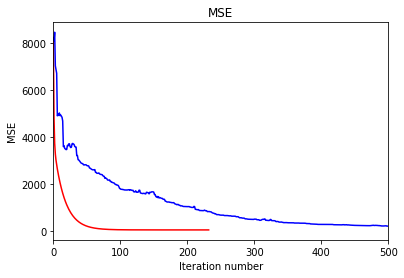

In [1006]:
plt.plot(range(len(mse_gd_L2)), mse_gd_L2, color='r')
plt.plot(range(len(mse_sgd_L2)), mse_sgd_L2, color='b')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 500)